# ADA project - Milestone 2

## Part 1

In [66]:
# Imports of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# import the CMU movie datasets
movie_column_names = ['Wikipedia_movie_ID',
                'Freebase_movie_ID',
                'movie_name',
                'movie_release_date',
                'movie_box_office_revenu',
                'movie_runtime',
                'movie_languages',
                'movie_countries',
                'movie_genres']

df_movies = pd.read_csv("MovieSummaries\movie.metadata.tsv", delimiter='\t', names = movie_column_names)
df_summaries = pd.read_csv('MovieSummaries/plot_summaries.txt', delimiter='\t', names=['movie_ID', 'movie_summary'])

#### 1.2) Processing a relational table to link every movies to every genre

The genre given to a movies is a easy and quick approach to get a first subset of fictional movies. Therefore, since multiple genre are given per movie, we extracted all genres into a new dataframe as a relational table between movies and genre.

In [10]:
# Split genres into a list of dictionaries
genres_list = df_movies['movie_genres'].apply(lambda x: eval(x) if pd.notna(x) else {})

# Initialize an empty list to store rows of the new Dataframe
new_rows = []

# Iterate over each row and process the genre dictionaries into new rows related to movie_id
for i, genres_dict in enumerate(genres_list):
    movie_id = df_movies.loc[i, 'Wikipedia_movie_ID']

    for genre_id, genre_name in genres_dict.items():
        new_rows.append({'Wikipedia_movie_ID': movie_id, 'Freebase_genre_ID': genre_id, 'movie_genre': genre_name})

# Create a new DataFrame from the list of rows
df_genres = pd.DataFrame(new_rows)

# Save the new DataFrame to a CSV file
df_genres.to_csv('cleaned_genres.csv', index=False)

# Display the genres related DataFrame
print(df_genres.head())

   Wikipedia_movie_ID Freebase_genre_ID      movie_genre
0              975900         /m/01jfsb         Thriller
1              975900          /m/06n90  Science Fiction
2              975900          /m/03npn           Horror
3              975900         /m/03k9fj        Adventure
4              975900          /m/0fdjb     Supernatural


### 1.3) All unique mentioned genres and their relative appearance

In [87]:
unique_genres = df_genres[['Freebase_genre_ID','movie_genre']].groupby('movie_genre', as_index=False).aggregate([pd.Series.mode, 'count']).copy()
unique_genres.columns = ['Freebase_ID', 'movie_count']
unique_genres = unique_genres.sort_values(by='movie_count', ascending=False)
unique_genres


,Freebase_ID,movie_count
movie_genre,,
Drama,/m/07s9rl0,34007
Comedy,/m/01z4y,16349
Romance Film,/m/02l7c8,10234
Black-and-white,/m/01g6gs,9094
Action,/m/02kdv5l,8798
...,...,...
Comdedy,/m/0bbctgg,1
New Queer Cinema,/m/022wy7,1
Linguistics,/m/0hj3nb2,1


<Axes: xlabel='movie_count', ylabel='movie_genre'>

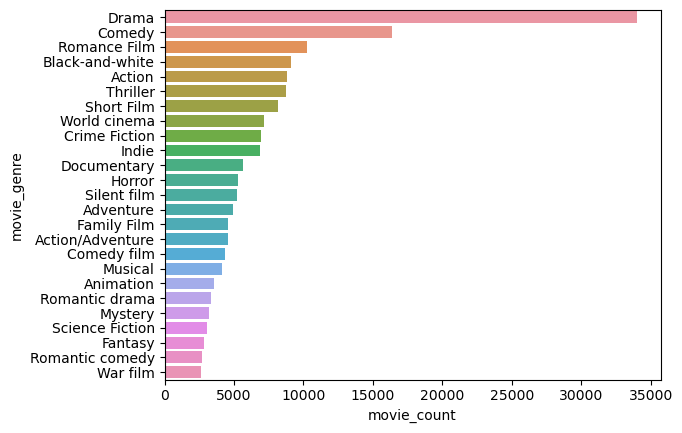

In [94]:
sns.barplot(data = unique_genres[['movie_count']].head(25).reset_index(),
            x = 'movie_count', y = 'movie_genre', orientation = 'horizontal')

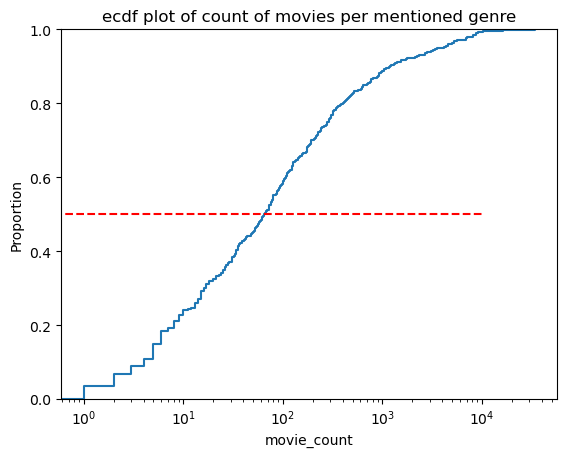

In [112]:
sns.ecdfplot(data = unique_genres, x = 'movie_count', log_scale=True)
plt.title("ecdf plot of count of movies per mentioned genre")
plt.hlines(y = 0.5, xmin = 0, xmax=1e4, linestyles='--', color = 'red')
# This would mean that 50% of the genres have less than 100 movies associated to it

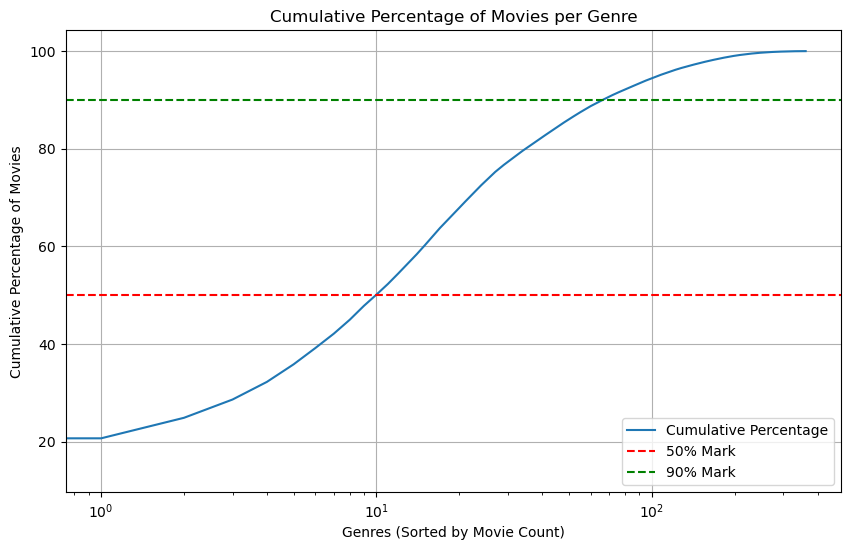

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming unique_genres is your DataFrame with movie_genre, Freebase_ID, and Count columns

# Plot the cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot((unique_genres['movie_count'].cumsum() / unique_genres['movie_count'].sum()) * 100, label='Cumulative Percentage')

plt.xscale('log')

# Highlight the 50% mark
plt.axhline(y=50, color='r', linestyle='--', label='50% Mark')

# Highlight the 90% mark (adjust as needed)
plt.axhline(y=90, color='g', linestyle='--', label='90% Mark')

# Set labels and title
plt.xlabel('Genres (Sorted by Movie Count)')
plt.ylabel('Cumulative Percentage of Movies')
plt.title('Cumulative Percentage of Movies per Genre')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'ecdf plot of count of movies per mentioned genre')

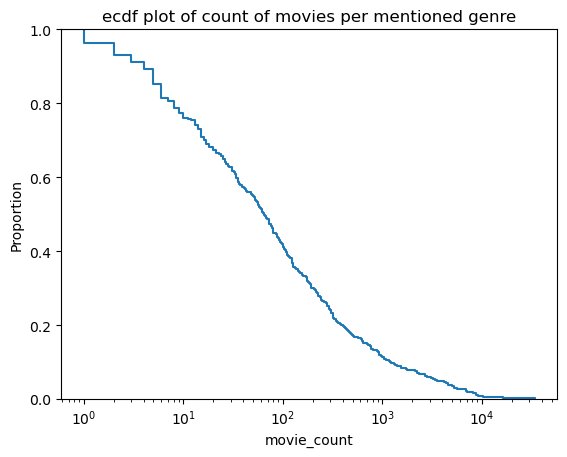

In [97]:
sns.ecdfplot(data = unique_genres, x = 'movie_count', log_scale=True, complementary=True)
plt.title("ccdf plot of count of movies per mentioned genre")
# This would mean that 50% of the genres have less than 100 movies associated to it